All required imports

In [22]:
import numpy as np
import matplotlib as plt
import sklearn
import os
import pandas as pd
#import keras
import os
from matplotlib import pyplot as plt
from scipy import ndimage, misc
import imageio
%matplotlib inline

This loads data into pandas dataframes

In [23]:
try:
    root
except:
    root = os.getcwd()

data_path = os.path.join(root, "./skin-cancer-mnist-ham10000")
# the associated meta data
metadata = pd.read_csv(os.path.join(data_path, "HAM10000_metadata.csv"))
# the pixels RGB
X_pixels = pd.read_csv(os.path.join(data_path, "hmnist_28_28_RGB.csv"))
np.shape(X_pixels)

(10015, 2353)

In [24]:
# image = plt.imread(os.path.join(data_path,"./HAM10000_images_part_1/ISIC_0024306.jpg"))/255.
# fig = plt.figure(figsize=(10,10))
# plt.imshow(image)

In [25]:
print(metadata.shape)
metadata.head()

(10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [26]:
print(X_pixels.shape)
X_pixels.drop(['label'], axis=1,inplace = True)
X_pixels.head()

(10015, 2353)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


Reformat metadata into X_metadata, categorical variables turned into one hot encoding, non-features removed.
Also make variable y into the classifications

In [27]:
X_metadata = metadata.loc[:, ['dx_type', 'age', 'sex', 'localization']]
X_metadata = pd.get_dummies(data=X_metadata, columns=['dx_type', 'sex', 'localization'])
X_metadata.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,75.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = pd.concat([X_metadata, X_pixels], axis = 1)
X.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,80.0,0,0,0,1,0,1,0,0,0,...,134,173,124,138,183,147,166,185,154,177
1,80.0,0,0,0,1,0,1,0,0,0,...,82,60,39,55,25,14,28,25,14,27
2,80.0,0,0,0,1,0,1,0,0,0,...,149,167,129,143,159,124,142,136,104,117
3,80.0,0,0,0,1,0,1,0,0,0,...,73,44,26,36,25,12,17,25,12,15
4,75.0,0,0,0,1,0,1,0,0,0,...,201,209,166,185,172,135,149,109,78,92


In [29]:
Y = metadata.loc[:, 'dx']
Y = pd.get_dummies(data=Y, columns=['dx'])
Y.head()

,akiec,bcc,bkl,df,mel,nv,vasc
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


Simply make X be the concatenation of X_pixels and X_metadata

In [30]:
X = pd.concat([X_metadata, X_pixels], axis = 1)
X.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,80.0,0,0,0,1,0,1,0,0,0,...,134,173,124,138,183,147,166,185,154,177
1,80.0,0,0,0,1,0,1,0,0,0,...,82,60,39,55,25,14,28,25,14,27
2,80.0,0,0,0,1,0,1,0,0,0,...,149,167,129,143,159,124,142,136,104,117
3,80.0,0,0,0,1,0,1,0,0,0,...,73,44,26,36,25,12,17,25,12,15
4,75.0,0,0,0,1,0,1,0,0,0,...,201,209,166,185,172,135,149,109,78,92


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Standardizing features
x = X_pixels.values
x = StandardScaler().fit_transform(x)

#Labels
y_ = Y.values*(np.arange(7)+1)
y = np.sum(y_,1)
y_labels = pd.DataFrame({'Label': y})
y_labels.head()

# pre-process the data
# Downsample class nv and remove the smallest 4 classes
nv_labels = y == 6
bkl_labels = y == 3
mel_labels = y == 5
#bcc_labels = y == 2
nv_sample = np.random.choice(y[nv_labels].shape[0], size = 1200, replace = False)
y_all = np.concatenate((y[nv_labels][nv_sample],y[bkl_labels],y[mel_labels]),0)
x_all = np.concatenate((x[nv_labels][nv_sample],x[bkl_labels],x[mel_labels]),0)

p = np.random.permutation(len(y_all))
x_all = x_all[p]
y_all = y_all[p]
#rename the labels
y_all[y_all == 6] = 0
y_all[y_all == 3] = 1
y_all[y_all == 5] = 2


In [32]:
def plot_2d(x,y,fig_title):
    # 2-component PCA plot
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(fig_title, fontsize = 20)

    #ax.set_zlabel('Principal Component 3', fontsize = 15)
    #leg = ['akiecc', 'bcc', 'bkl','df','mel','nv','vasc']
    #leg = ['nv','bkl','mel','bcc']
    leg = ['nv','bkl','mel']

    for k in range(np.size(leg)):
        #indices to plot
        b = y == k 
        ax.scatter(x[b,0],x[b,1], s = 50)
        ax.legend(leg)
    
    return fig

def plot_3d(x,y):
    from mpl_toolkits.mplot3d import Axes3D
    #3-components PCA plot
    fig = plt.figure(figsize = (8,8))
    ax = Axes3D(fig)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)

    #ax.set_zlabel('Principal Component 3', fontsize = 15)
    #leg = ['akiecc', 'bcc', 'bkl','df','mel','nv','vasc']
    #leg = ['nv','bkl','mel','bcc']
    leg = ['nv','bkl','mel']

    for k in range(np.size(leg)):
        #indices to plot
        b = y == k 
        ax.scatter(x[b,0],x[b,1],x[b,2], s = 50)
        ax.legend(leg)


In [33]:
#PCA
pca = PCA(n_components=3)
principalComponents_PCA = pca.fit_transform(x_all)
print('Explained variance ratio of components: %s'
      % str(pca.explained_variance_ratio_))



Explained variance ratio of components: [0.35799276 0.16104469 0.11784201]


/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of

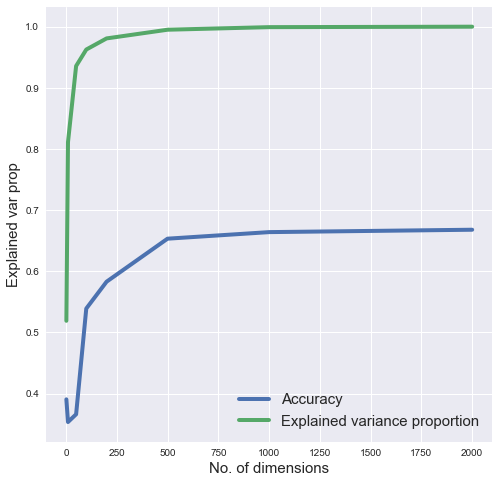

In [34]:
# plot classifier accuracy as a function of dimensions

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

dim_vect = np.array([2,10,50,100,200,500,1000,2000])
accuracy = np.zeros([dim_vect.size,1])
var_prop = np.zeros([dim_vect.size,1])
f1 = np.zeros([dim_vect.size,1])

for k in range(np.size(dim_vect)):
    dim = dim_vect[k]
    pca = PCA(n_components=dim)
    principalComponents_PCA = pca.fit_transform(x_all)
    
    train_features, test_features, train_label, test_label = train_test_split(principalComponents_PCA, y_all, test_size=0.3, random_state=42)
    clf = SVC(kernel = 'rbf')
    
    clf.fit(train_features, train_label)
    y_pred = clf.predict(test_features)
    num_right = np.sum(test_label == y_pred)
    accuracy[k] = num_right / test_label.shape[0]
    var_prop[k] = sum(pca.explained_variance_ratio_)
    f1[k] = f1_score(test_label, y_pred, average = 'macro')
 
leg = ['Accuracy','Explained variance proportion']

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1) 
ax1.set_xlabel('No. of dimensions', fontsize = 15)
ax1.set_ylabel('Accuracy/Explained var prop', fontsize = 15)
ax1.plot(dim_vect, accuracy,linewidth=4)
ax2 = fig.add_subplot(1,1,1) 
ax2.set_xlabel('No. of dimensions', fontsize = 15)
ax2.set_ylabel('Explained var prop', fontsize = 15)
ax2.plot(dim_vect, var_prop,linewidth=4)
ax2.legend(leg,fontsize = 15)

fig.savefig('../Figures/PCA_dimensions.png')


/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


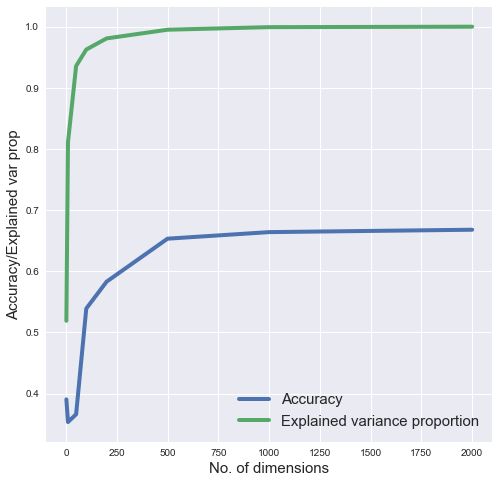

In [35]:
leg = ['Accuracy','Explained variance proportion']

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1) 
ax1.set_xlabel('No. of dimensions', fontsize = 15)
ax1.set_ylabel('Accuracy/Explained var prop', fontsize = 15)
ax1.plot(dim_vect, accuracy,linewidth=4)

# ax2 = fig.add_subplot(1,1,1) 
# ax2.set_xlabel('No. of dimensions', fontsize = 15)
# ax2.set_ylabel('F-1 score', fontsize = 15)
# ax2.plot(dim_vect, f1, linewidth=4)
# ax2.legend(leg,fontsize = 15)

ax3 = fig.add_subplot(1,1,1) 
ax3.set_xlabel('No. of dimensions', fontsize = 15)
ax3.set_ylabel('Accuracy/Explained var prop', fontsize = 15)
ax3.plot(dim_vect, var_prop,linewidth=4)
ax3.legend(leg,fontsize = 15)
fig.savefig('../Figures/PCA_dimensions.png')

#print(f1)

In [36]:
#LDA with 3 classes
lda = LDA(n_components=2)
lda.fit(x_all, y_all)
principalComponents_LDA = lda.fit_transform(x_all,y_all)

print('Explained variance ratio of components: %s'
      % str(lda.explained_variance_ratio_))


Explained variance ratio of components: [0.52480167 0.47519833]


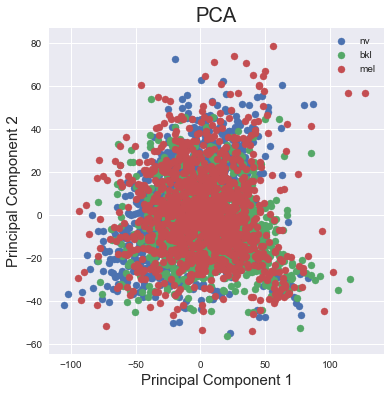

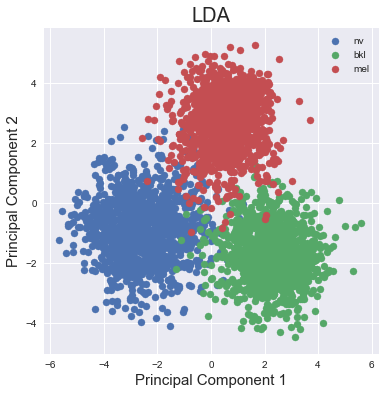

In [37]:
# plot PCA and LDA clusters for three classes
plot1 = plot_2d(principalComponents_PCA,y_all,'PCA')

plot1.savefig('../Figures/PCA.png')
    
plot2 = plot_2d(principalComponents_LDA,y_all,'LDA')
plot2.savefig('../Figures/LDA.png')

/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9778672032193159


/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.960801393728223


/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9454253611556982
0.926681783824641


/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


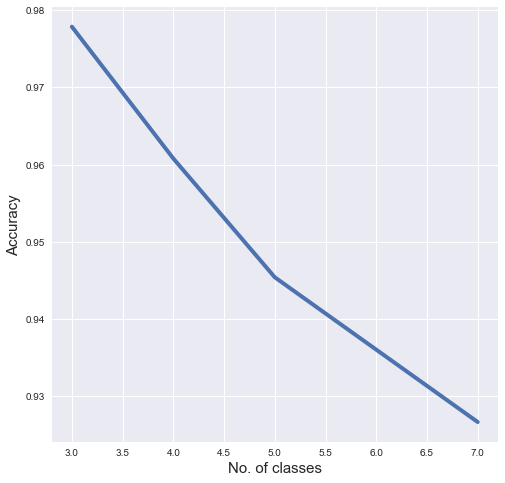

In [38]:
# classification performance as a function of no. of classes

# pre-process the data
# Downsample class nv and remove the smallest 4 classes
class_vect = np.array([3,4,5,7])
#class_vect = np.array([7])
class_names = ['akiecc', 'bcc', 'bkl','df','mel','nv','vasc']

def lda_svm_classification(y,x,numClasses):

    nv_labels = y == 6
    bkl_labels = y == 3
    mel_labels = y == 5
        
    #Down sample nv labels
    nv_sample = np.random.choice(y[nv_labels].shape[0], size = 1099, replace = False)
        
    if numClasses == 3:
        labels_to_include = ['nv','bkl','mel']        
        y_all = np.concatenate((y[nv_labels][nv_sample],y[bkl_labels],y[mel_labels]),0)
        x_all = np.concatenate((x[nv_labels][nv_sample],x[bkl_labels],x[mel_labels]),0)
        
    elif numClasses == 4:
        bcc_labels = y == 2
        labels_to_include = ['nv','bkl','mel','bcc'] 
        y_all = np.concatenate((y[nv_labels][nv_sample],y[bkl_labels],y[mel_labels],y[bcc_labels]),0)
        x_all = np.concatenate((x[nv_labels][nv_sample],x[bkl_labels],x[mel_labels],x[bcc_labels]),0)
        
    elif numClasses == 5:
        bcc_labels = y == 2
        akiec_labels = y == 1
        labels_to_include = ['nv','bkl','mel','bcc','akiec'] 
        y_all = np.concatenate((y[nv_labels][nv_sample],y[bkl_labels],y[mel_labels],y[bcc_labels],y[akiec_labels]),0)
        x_all = np.concatenate((x[nv_labels][nv_sample],x[bkl_labels],x[mel_labels],x[bcc_labels],x[akiec_labels]),0)
        
    elif numClasses == 7:
        bcc_labels = y == 2
        akiec_labels = y == 1
        df_labels = y == 4
        vasc_labels = y == 7
        labels_to_include = class_names
        y_all = np.concatenate((y[nv_labels][nv_sample],y[bkl_labels],y[mel_labels],y[bcc_labels],y[akiec_labels],y[df_labels],y[vasc_labels]),0)
        x_all = np.concatenate((x[nv_labels][nv_sample],x[bkl_labels],x[mel_labels],x[bcc_labels],x[akiec_labels],x[df_labels],x[vasc_labels]),0)
               
        
    p = np.random.permutation(len(y_all))
    x_all = x_all[p]
    y_all = y_all[p]
    
    #LDA 
    lda = LDA(n_components=numClasses-1)
    lda.fit(x_all, y_all)
    principalComponents_LDA = lda.fit_transform(x_all,y_all)

    # Train SVM 
    train_features, test_features, train_label, test_label = train_test_split(principalComponents_LDA, y_all, test_size=0.3, random_state=42)
    clf = SVC(kernel = 'rbf')
    clf.fit(train_features, train_label)
    y_pred = clf.predict(test_features)
    conf_matrix = confusion_matrix(test_label, y_pred)
    class_report = classification_report(test_label,y_pred)
    num_right = np.sum(test_label == y_pred)
#     print(y_pred[:100])
#     print(test_label[:100])
    accuracy = num_right / test_label.shape[0]
    return accuracy, class_report, conf_matrix, principalComponents_LDA, y_all

#LDA
accuracy_full = np.zeros([class_vect.size,1])
for k in range(class_vect.size):
    accuracy, class_report, conf_matrix, principalComponents_LDA, y_all = lda_svm_classification(y,x,class_vect[k])
    print(accuracy)
    
    accuracy_full[k] = accuracy

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1) 
ax1.set_xlabel('No. of classes', fontsize = 15)
ax1.set_ylabel('Accuracy', fontsize = 15)
ax1.plot(class_vect, accuracy_full,linewidth=4)


In [39]:
fig.savefig('../Figures/LDA_accuracy.png')

In [40]:
def plot_conf_matrix(conf_matrix, labels, directory):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sn
    import pandas as pd
    import seaborn as sns
    import math
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib as mpl

    plt.style.use('seaborn')
    conf_arr = conf_matrix

    s = conf_arr.sum(axis = 1)
    conf_arr = (conf_arr * 100.0) / s[:,None]
    conf_arr = np.nan_to_num(conf_arr)
    df_cm = pd.DataFrame(conf_arr, 
      index = labels,
      columns = labels)
    
    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

    plt.yticks(np.arange(len(labels)) + .5, labels,va='center')
    plt.title('Confusion Matrix')
    plt.xlabel("Prediction")
    plt.ylabel("Class")
    plt.savefig(directory, dpi=100, bbox_inches='tight' )
    plt.show()
    plt.close()
    
    return fig


/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


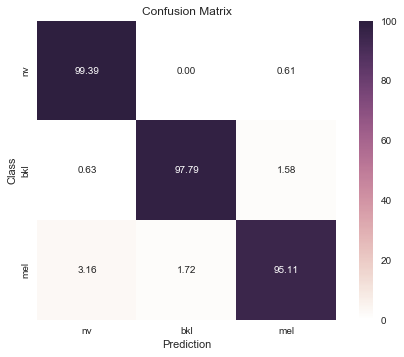

/Users/mshekhar7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


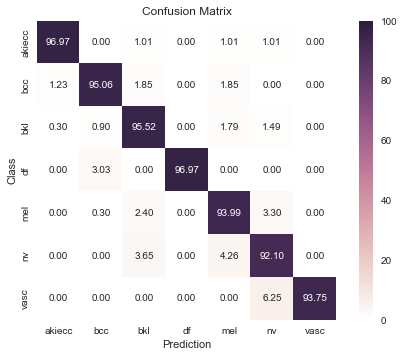

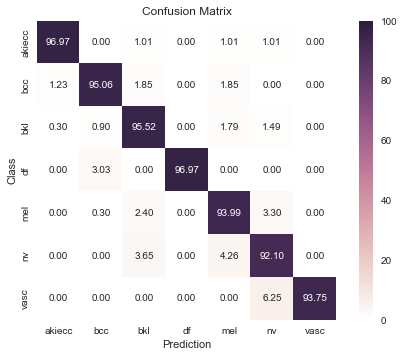

In [41]:
# plot the classes and confusion matrix for 3 classes and 7 classes

# 3 classes
accuracy, class_report, conf_matrix, principalComponents_LDA, y_all = lda_svm_classification(y,x,3)
class_names = ['nv','bkl','mel']
plot_conf_matrix(conf_matrix, class_names, '../Figures/confusion_matrix_LDA_3classes.png')
    
# 7-classes
accuracy, class_report, conf_matrix, principalComponents_LDA,y_all = lda_svm_classification(y,x,7)
class_names = ['akiecc', 'bcc', 'bkl','df','mel','nv','vasc']
plot_conf_matrix(conf_matrix, class_names, '../Figures/confusion_matrix_LDA_7classes.png')